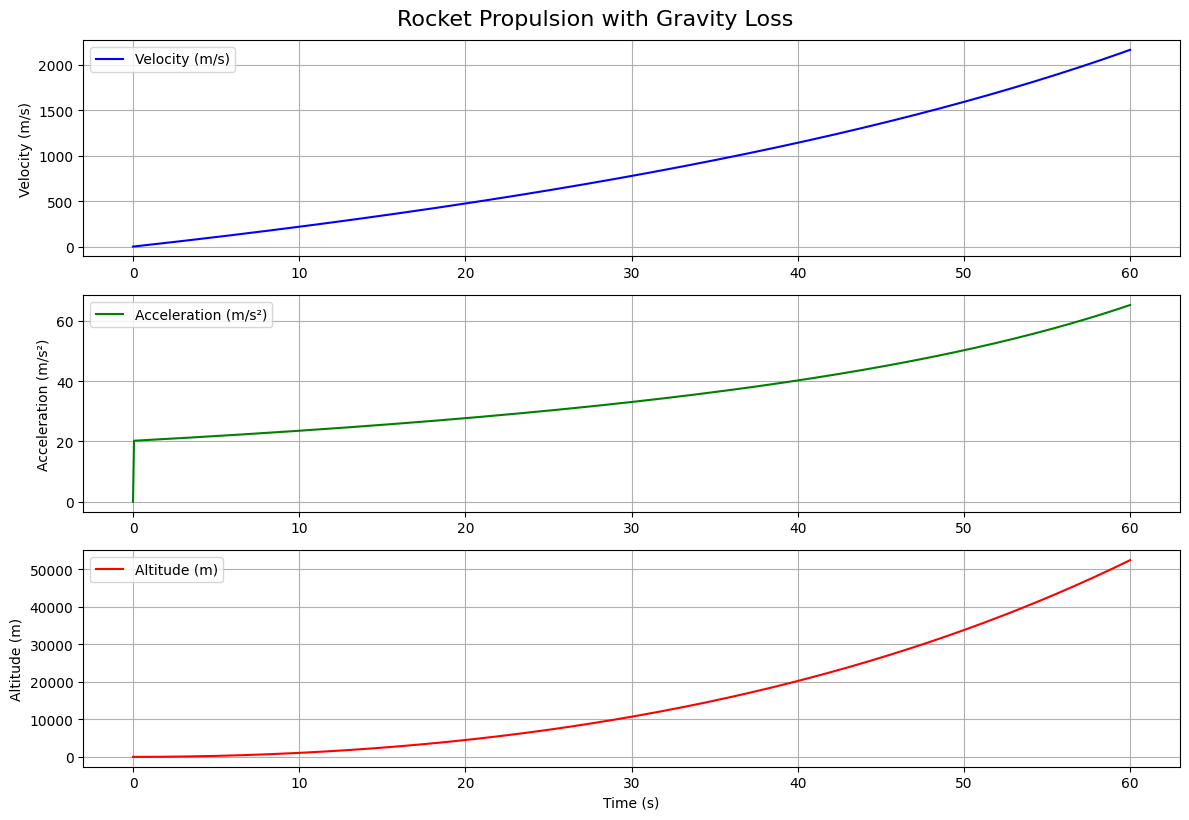

In [1]:
# Rocket Propulsion with Gravity Loss

import numpy as np
import matplotlib.pyplot as plt

# Constants
g0 = 9.81 # Gravity (m/s²)

# Rocket Parameters
m0 = 50000         # initial mass (kg)
mf = 20000         # Final mass after fuel is burnt (kg)
ve = 3000          # Effective exhaust velocity (m/s)
burn_time = 60     # Burn time (s)

# Time steps
t = np.linspace(0, burn_time, 1000)
dt = t[1] - t[0]
mdot = (m0 - mf) / burn_time  # Mass flow rate (kg/s)

# Initialize arrays
mass = np.zeros_like(t)
velocity = np.zeros_like(t)
altitude = np.zeros_like(t)
acceleration = np.zeros_like(t)

mass[0] = m0

for i in range(1, len(t)):
    mass[i] = mass[i - 1] - mdot * dt
    thrust = ve * mdot
    weight = mass[i] * g0
    net_force = thrust - weight
    acceleration[i] = net_force / mass[i]
    velocity[i] = velocity[i - 1] + acceleration[i] * dt
    altitude[i] = altitude[i - 1] + velocity[i] * dt

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, velocity, label="Velocity (m/s)", color='blue')
plt.ylabel("Velocity (m/s)")
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, acceleration, label="Acceleration (m/s²)", color='green')
plt.ylabel("Acceleration (m/s²)")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, altitude, label="Altitude (m)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle("Rocket Propulsion with Gravity Loss", fontsize=16, y=1.02)
plt.show()